<a href="https://colab.research.google.com/github/MarioJovanovski/SI_2022_lab1_203172/blob/master/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%81%D0%BA%D0%B0Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mario Jovanovski 203172
Tema 21

Sentiment Analysis: Analyze the sentiment of #LongCovid tweets to understand the emotional impact of long COVID on individuals. Identify patterns and trends in positive, negative, or neutral sentiments expressed in these tweets.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd

dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lc2021.csv')
dt.head()

,Date,User,Tweets
0,2021-06-29 23:59:21+00:00,Aineemac82,@1976vintage @sstroschein2 @Parents_Utd @Dmodo...
1,2021-06-29 23:58:59+00:00,SerpinaLonghaul,Very useful guidelines for maintaining indoor ...
2,2021-06-29 23:58:23+00:00,SusannahMcCon,"@Rat_Licker1984 With their 'long"" covid"
3,2021-06-29 23:57:42+00:00,MTOakman,@ThomasO62593131 @rekhuli @GrooveLocked88 @ber...
4,2021-06-29 23:56:12+00:00,rrp454,@jimmywalks2 @janemor50334582 @FinancialPopper...


In [ ]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")
print(nlp(dt['Tweets'][10]))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9987903237342834}]


In [ ]:
dt.isnull().sum()

Date      0
User      1
Tweets    1
dtype: int64

In [ ]:
dt = dt.dropna()
dt.isnull().sum()

Date      0
User      0
Tweets    0
dtype: int64

In [ ]:
from textblob import TextBlob

tweets = dt['Tweets']

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

dt['sentiment'] = tweets.apply(get_sentiment)

In [ ]:
dt

,Date,User,Tweets,sentiment
0,2021-06-29 23:59:21+00:00,Aineemac82,@1976vintage @sstroschein2 @Parents_Utd @Dmodo...,positive
1,2021-06-29 23:58:59+00:00,SerpinaLonghaul,Very useful guidelines for maintaining indoor ...,positive
2,2021-06-29 23:58:23+00:00,SusannahMcCon,"@Rat_Licker1984 With their 'long"" covid",negative
3,2021-06-29 23:57:42+00:00,MTOakman,@ThomasO62593131 @rekhuli @GrooveLocked88 @ber...,positive
4,2021-06-29 23:56:12+00:00,rrp454,@jimmywalks2 @janemor50334582 @FinancialPopper...,negative
...,...,...,...,...
823421,2021-10-01 00:06:27+00:00,MrLeeUber,My money is on @cenkuygur \nTiny @joerogan has...,negative
823422,2021-10-01 00:03:00+00:00,TIME,Can breakthrough infections lead to long COVID...,negative
823423,2021-10-01 00:02:06+00:00,nadine_bonnett,@SeenAndForeseen @GermHunterMD You’re making t...,negative
823424,2021-10-01 00:01:09+00:00,barbvee,@White_Gold_Lith @VicGovDH All blame is on #Sc...,negative


In [ ]:
dt.head()

,Date,User,Tweets,sentiment
0,2021-06-29 23:59:21+00:00,Aineemac82,@1976vintage @sstroschein2 @Parents_Utd @Dmodo...,positive
1,2021-06-29 23:58:59+00:00,SerpinaLonghaul,Very useful guidelines for maintaining indoor ...,positive
2,2021-06-29 23:58:23+00:00,SusannahMcCon,"@Rat_Licker1984 With their 'long"" covid",negative
3,2021-06-29 23:57:42+00:00,MTOakman,@ThomasO62593131 @rekhuli @GrooveLocked88 @ber...,positive
4,2021-06-29 23:56:12+00:00,rrp454,@jimmywalks2 @janemor50334582 @FinancialPopper...,negative


In [ ]:
dt['sentiment'].value_counts()

positive    407063
negative    363297
neutral      53066
Name: sentiment, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'positive'), Text(1, 0, 'negative'), Text(2, 0, 'neutral')])

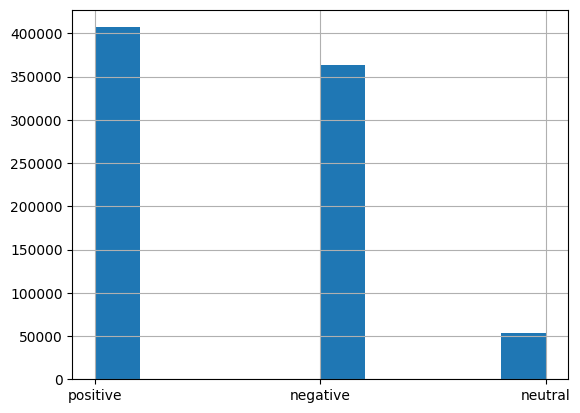

In [ ]:
import matplotlib.pyplot as plt
dt['sentiment'].hist()
plt.xticks()

In [ ]:
import numpy as np
import pandas as pd

dt22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lc2022.csv')
dt22.head()

,Date,User,Tweets
0,2022-01-31 23:59:18+00:00,RobocapFriend,@kathymi71147962 @RiaRex2 My s-in-law had Covi...
1,2022-01-31 23:59:18+00:00,LupusWarrior69,@MarinaSilver6 Long COVID sucks. But you make ...
2,2022-01-31 23:58:12+00:00,ElsaOrgana,@PortiaMcGonagal It’s been one for about a mon...
3,2022-01-31 23:57:59+00:00,WilliamAHirsch,Living with covid also means lifelong health p...
4,2022-01-31 23:57:58+00:00,persistingvirus,Long Covid. Scientists agreed leading theory i...


In [ ]:
dt22 =dt22.dropna()
dt22.isnull().sum()

Date      0
User      0
Tweets    0
dtype: int64

In [ ]:
from textblob import TextBlob

tweets = dt22['Tweets']

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

dt22['sentiment'] = tweets.apply(get_sentiment)

In [ ]:
dt22

,Date,User,Tweets,sentiment
0,2022-01-31 23:59:18+00:00,RobocapFriend,@kathymi71147962 @RiaRex2 My s-in-law had Covi...,negative
1,2022-01-31 23:59:18+00:00,LupusWarrior69,@MarinaSilver6 Long COVID sucks. But you make ...,positive
2,2022-01-31 23:58:12+00:00,ElsaOrgana,@PortiaMcGonagal It’s been one for about a mon...,negative
3,2022-01-31 23:57:59+00:00,WilliamAHirsch,Living with covid also means lifelong health p...,negative
4,2022-01-31 23:57:58+00:00,persistingvirus,Long Covid. Scientists agreed leading theory i...,negative
...,...,...,...,...
1465844,2022-09-01 00:00:53+00:00,ahandvanish,@womeninchurch @patientled and @itsbodypolitic...,neutral
1465845,2022-09-01 00:00:53+00:00,Suemonti57,@SteveBigpond @mjrowland68 How many times are ...,positive
1465846,2022-09-01 00:00:38+00:00,KariDru,Longcovid life: my kettle beeped and Fenris se...,neutral
1465847,2022-09-01 00:00:18+00:00,twogukuk,@kksheld Have you seen the symptoms of long co...,positive


In [ ]:
dt22['sentiment'].value_counts()

positive    832609
negative    558087
neutral      75150
Name: sentiment, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'negative'), Text(1, 0, 'positive'), Text(2, 0, 'neutral')])

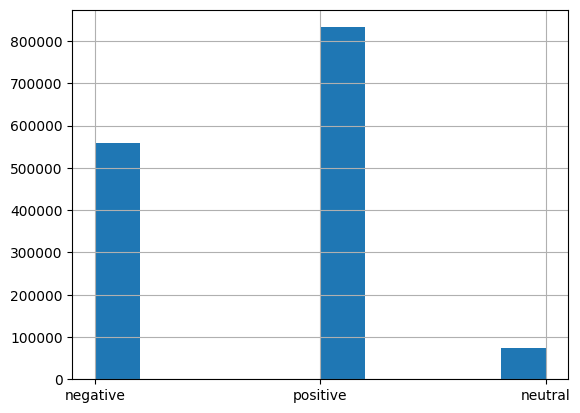

In [ ]:
import matplotlib.pyplot as plt
dt22['sentiment'].hist()
plt.xticks()